# Kernel Density Estimation

Lectura recomendada: https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

Datos de exoplanetas al 2021, fuente: Exoplanet.eu

In [16]:
!wget https://github.com/fjbautistas/kde_example/raw/master/data/exoplanet.eu_catalog_21.csv

--2022-02-21 17:10:05--  https://github.com/fjbautistas/kde_example/raw/master/data/exoplanet.eu_catalog_21.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fjbautistas/kde_example/master/data/exoplanet.eu_catalog_21.csv [following]
--2022-02-21 17:10:05--  https://raw.githubusercontent.com/fjbautistas/kde_example/master/data/exoplanet.eu_catalog_21.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2244760 (2.1M) [text/plain]
Saving to: ‘exoplanet.eu_catalog_21.csv.1’

exoplanet.eu_catalo 100%[===================>]   2.14M  --.-KB/s    in 0.06s   

2022-02-21 17:10:06 (33.7 MB/s) - ‘exoplan

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_o = pd.read_csv('exoplanet.eu_catalog_21.csv', 
                       usecols = ['mass','semi_major_axis',
                                  'star_metallicity'])

In [4]:
data_o = data_o.replace([np.inf, -np.inf], np.nan) 
data_o = data_o.replace([0], np.nan)
data_o = data_o.dropna()

Text(0, 0.5, 'semimajor axis in AU')

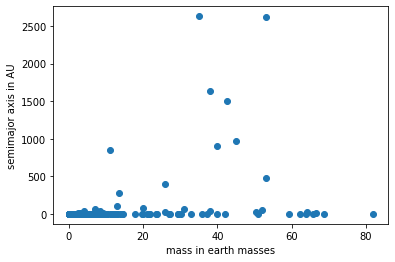

In [7]:
plt.scatter((data_o.mass),(data_o.semi_major_axis))
plt.xlabel("mass in earth masses")
plt.ylabel("semimajor axis in AU")

Text(0, 0.5, 'semimajor axis in AU')

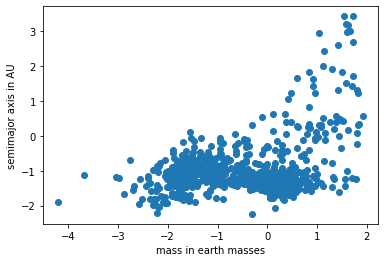

In [18]:
plt.scatter(np.log10(data_o.mass),np.log10(data_o.semi_major_axis))
plt.xlabel("mass in earth masses")
plt.ylabel("semimajor axis in AU")

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'semimajor axis in AU')

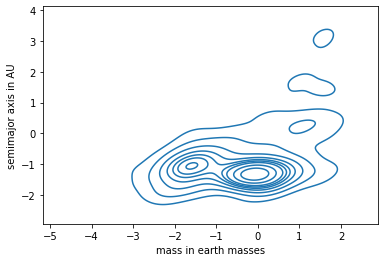

In [19]:
sns.kdeplot(np.log10(data_o.mass),np.log10(data_o.semi_major_axis))
plt.xlabel("mass in earth masses")
plt.ylabel("semimajor axis in AU")

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(336.9714285714286, 0.5, 'semimajor axis in AU')

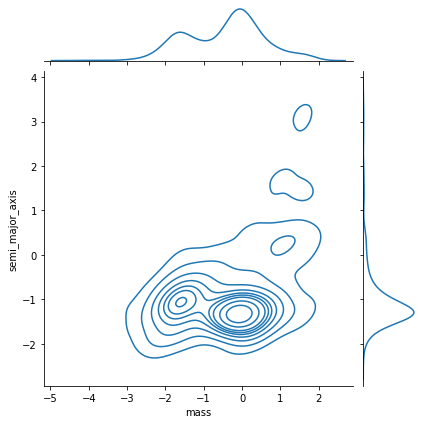

In [20]:
sns.jointplot(np.log10(data_o.mass),np.log10(data_o.semi_major_axis),kind='kde')
plt.xlabel("mass in earth masses")
plt.ylabel("semimajor axis in AU")

Text(0.5, 0, 'mass in earth masses')

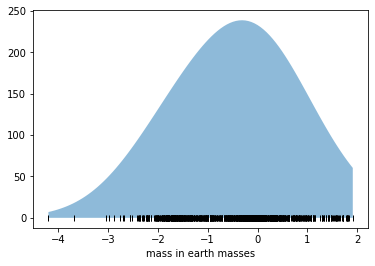

In [28]:
from scipy.stats import norm
x=np.log10(data_o.mass)
x_d = np.linspace(x.min(),x.max(),100)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.xlabel("mass in earth masses")


Text(0.5, 0, 'mass in earth masses')

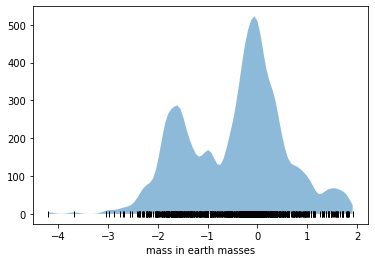

In [29]:
from scipy.stats import norm
x=np.log10(data_o.mass)
x_d = np.linspace(x.min(),x.max(),100)
density = sum(norm(xi,0.1).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.xlabel("mass in earth masses")

#plt.axis([-4, 8, -0.2, 5]);